In [4]:
import numpy as np
import pandas as pd
import time
import sys
import os
import h5py
from joblib import Parallel, delayed
sys.path.append('../')
from packages import actv_analysis, svm, load_csv, stats, objects, test_codes
import pickle
import re
import glob

In [ ]:
net=1
relu=5
epoch=0

print(f'Network{net} Relu{relu} Epoch{epoch}')
pickle_filename = f'network{net}_Relu{relu}_epoch{epoch}.pkl'

if os.path.exists(pickle_filename):
    try:
        with open(pickle_filename, 'rb') as f:
            units = pickle.load(f)
    except EOFError:
        print(f"Pickle file {pickle_filename} failed to load. Looking for backup...")

In [ ]:
stats.dim_reduct(technique='both', net=net, relu=relu, epoch=epoch, units=units, units_sample_size=1000)

In [ ]:
net=1
relu=5
epoch=0
n_comp=2;min_sz_idx=3; max_sz_idx=9; numbers=range(2,21,2)

sizes = np.arange(4,14)[min_sz_idx: max_sz_idx+1]
actv_net = actv_analysis.get_actv_net(net=net,relu=relu,epoch=epoch)
take = np.arange(0,100).reshape(10,10)[:,min_sz_idx:max_sz_idx+1].reshape(len(numbers)*(max_sz_idx-min_sz_idx+1))
avg_actv_szAtoB = np.mean(actv_net[:,take,:],axis=2)

In [ ]:
# Sample a subset of your data. 
units_sample_size=1000
random_state=42

np.random.seed(random_state)  # for reproducibility
idx = np.random.choice(avg_actv_szAtoB.shape[0], units_sample_size, replace=False)
data_sample = avg_actv_szAtoB[idx, :]
pn_sample = [units[i].PN for i in idx]  

In [ ]:
from umap import UMAP
from sklearn.manifold import TSNE

tsne = TSNE(n_components=n_comp, random_state=random_state)
tsne_results = tsne.fit_transform(data_sample)

In [ ]:
data_sample

In [ ]:
# Suppose your data is in variable data_sample
has_nan = np.isnan(data_sample)

if np.any(has_nan):
    print("The data_sample contains NaN values.")
else:
    print("The data_sample does not contain any NaN values.")

In [ ]:
data_sample.shape

In [ ]:
net=1

for relu in range(2,6):
    
    ns_up_or_down = []
    for epoch in range(0,91,10):
    
        pkl_filename = f'pkl/network{net}_Relu{relu}_epoch{epoch}.pkl'
        if os.path.exists(pkl_filename):
            try:
                with open(pkl_filename, 'rb') as f:
                    units = pickle.load(f)
            except Exception as e:
                    print(f"Pickle file {pkl_filename} failed to load due to error: {e}")

            responsive_units = np.array([units[i].id for i in range(len(units)) if units[i].no_response_subset==False]) 

            nb_mon = np.array([units[i].num_monotonicity for i in range(len(responsive_units))])
            sz_mon = np.array([units[i].size_monotonicity for i in range(len(responsive_units))])
            prfd_num = np.array([units[i].PN for i in range(len(responsive_units))])
            prfd_sz = np.array([units[i].PS for i in range(len(responsive_units))])

            nusu = np.sum((nb_mon == 1) & (sz_mon == 1) & (prfd_num == 20) & (prfd_sz == 13))/len(units) 
            nusd = np.sum((nb_mon == 1) & (sz_mon == -1) & (prfd_num == 20) & (prfd_sz == 7))/len(units)  
            ndsu = np.sum((nb_mon == -1) & (sz_mon == 1) & (prfd_num == 2) & (prfd_sz == 13))/len(units)  
            ndsd = np.sum((nb_mon == -1) & (sz_mon == -1) & (prfd_num == 2) & (prfd_sz == 7))/len(units)  
            
            # save this numbers as 2x2 dataframe where rows represent nu and nd and columns represent su and sd
            # append it to ns_up_or_down
    # Plot a figure with subplots each representing epoch. Arrange them in 5x2 format.
    # set axes label size to 14, title 20
    # tight_layout
    # plt.show
    # save the fig in pdf format
            

In [ ]:
responsive_units = np.array([units[i].id for i in range(len(units)) if units[i].no_response_subset==False]) 

nb_mon = np.array([units[i].num_monotonicity for i in range(len(responsive_units))])
sz_mon = np.array([units[i].size_monotonicity for i in range(len(responsive_units))])
prfd_num = np.array([units[i].PN for i in range(len(responsive_units))])
prfd_sz = np.array([units[i].PS for i in range(len(responsive_units))])

nusu = np.sum((nb_mon == 1) & (sz_mon == 1) & (prfd_num == 20) & (prfd_sz == 13))/len(units) 
nusd = np.sum((nb_mon == 1) & (sz_mon == -1) & (prfd_num == 20) & (prfd_sz == 7))/len(units)  
ndsu = np.sum((nb_mon == -1) & (sz_mon == 1) & (prfd_num == 2) & (prfd_sz == 13))/len(units)  
ndsd = np.sum((nb_mon == -1) & (sz_mon == -1) & (prfd_num == 2) & (prfd_sz == 7))/len(units)  

In [ ]:
ndsd

In [3]:
net=2;relu=3;epoch=0
min_sz_idx=3
max_sz_idx=9
numbers = np.arange(2,21,2)
sizes = np.arange(4,14)[min_sz_idx: max_sz_idx+1]

pkl_filename = f'pkl/network{net}_Relu{relu}_epoch{epoch}.pkl'
if os.path.exists(pkl_filename):
    try:
        with open(pkl_filename, 'rb') as f:
            units = pickle.load(f)
    except Exception as e:
        print(f"Pickle file {pkl_filename} failed to load due to error: {e}")
        
actv_net = actv_analysis.get_actv_net(net=net, relu=relu, epoch=epoch)
take = np.arange(0,100).reshape(10,10)[:,min_sz_idx:max_sz_idx+1].reshape(len(numbers)*(max_sz_idx-min_sz_idx+1))
actv_szAtoB = actv_net[:,take,:]
actv_2D = actv_szAtoB.reshape(actv_szAtoB.shape[0], actv_szAtoB.shape[1]*actv_szAtoB.shape[2])

--- 112.70572710037231 seconds ---


In [7]:
incomplete_units = np.array([i for i in range(len(units)) 
                             if not units[i].no_response_subset and 
                             all(attr is None for attr in [units[i].anova2_numbers, units[i].anova2_sizes, units[i].selectivity_number])])

In [6]:
_ = [units[u].add_anova2(actv_2D, numbers,sizes, inst=500, parallel=0) for u in incomplete_units]

In [8]:
incomplete_units

array([], dtype=float64)

In [43]:
net=1
relu=4
epoch=0

pkl_filename = f'pkl/network{net}_Relu{relu}_epoch{epoch}.pkl'
with open(pkl_filename, 'rb') as f:
    units = pickle.load(f)

In [44]:
# Create a dictionary with your data
data = {
    'spearman_number': [units[i].spearmanr_number for i in range(len(units))],
    'spearman_size': [units[i].spearmanr_size for i in range(len(units))],
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

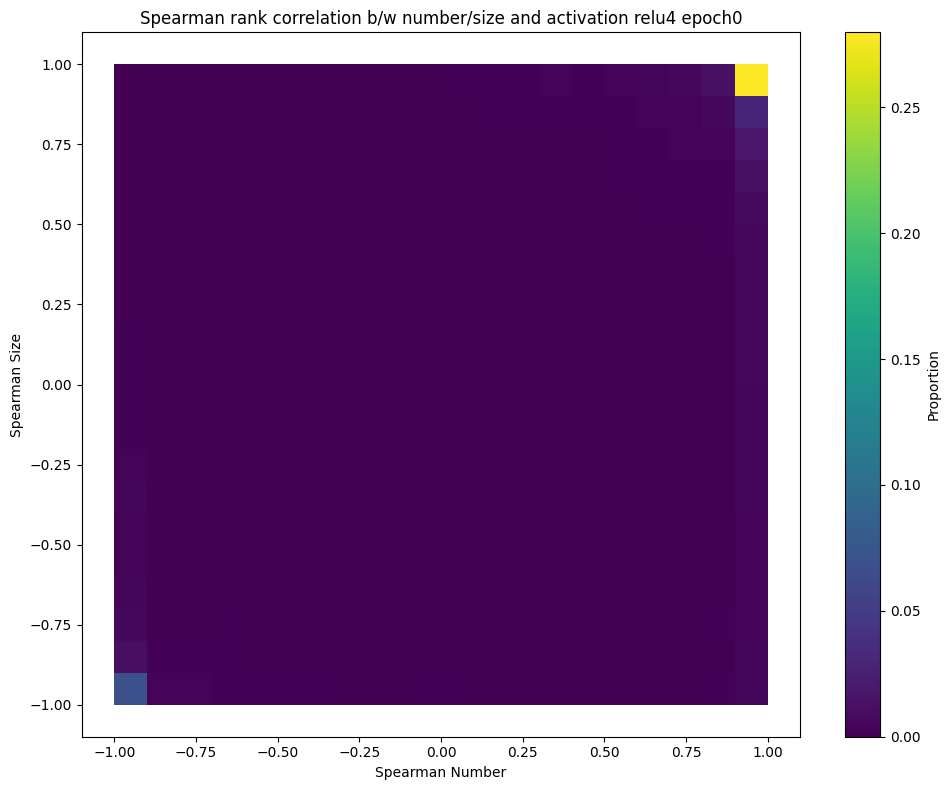

In [45]:
import matplotlib.colors as colors

# Create weights for each pair of (spearman_number, spearman_size)
weights = np.ones_like(df['spearman_number']) / len(df['spearman_number'])

plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('viridis')
cmap.set_bad(cmap(0))
sns.histplot(df, x='spearman_number', y='spearman_size', bins=20, cbar=True, cmap=cmap,
             cbar_kws={'label': 'Proportion', 'norm': colors.LogNorm()}, weights=weights)

plt.title(f'Spearman rank correlation b/w number/size and activation relu{relu} epoch{epoch}')
plt.xlabel('Spearman Number')
plt.ylabel('Spearman Size')
plt.tight_layout()
plt.savefig(f'Spearman rank correlation bw number_size and activation relu{relu} epoch{epoch}.pdf')
plt.show()

In [12]:
import os
import shutil

# Print the current working directory
print("Current working directory: ", os.getcwd())

# Source folder
src_dir = "svm_results"
print("Source directory: ", src_dir)

# Destination folder
dst_dir = "svm_results/4to20"
print("Destination directory: ", dst_dir)

# Create destination directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# Loop through all files in the source directory
for root, dirs, files in os.walk(src_dir):
    for filename in files:
        if filename.endswith("4to20.csv"):  # If the filename matches the pattern
            print("Moving file: ", filename)
            # Full path to the source file
            src_file = os.path.join(root, filename)
            # Full path to the destination file
            dst_file = os.path.join(dst_dir, filename)
            # Move the file to the destination directory
            shutil.move(src_file, dst_file)

Current working directory:  /Users/dongillee/Interference/codes/fig1
Source directory:  svm_results
Destination directory:  svm_results/4to20


In [2]:
actv_ = actv_analysis.get_actv_net(net=1, relu=5, epoch=0)

--- 102.15391731262207 seconds ---


In [4]:
actv_.shape

(43264, 100, 500)

In [6]:
net=1
relu=4
epoch=0

print(f'Network{net} Relu{relu} Epoch{epoch}')
pickle_filename = f'pkl/4to20/network{net}_Relu{relu}_epoch{epoch}_4to20.pkl'

if os.path.exists(pickle_filename):
    try:
        with open(pickle_filename, 'rb') as f:
            units = pickle.load(f)
    except EOFError:
        print(f"Pickle file {pickle_filename} failed to load. Looking for backup...")

Network1 Relu4 Epoch0


In [8]:
units[0].p